In [1]:
# Import libraries
import sys
import os
import pandas as pd
import h5py
import numpy as np
import json 
import pandas as pd
import matplotlib.pylab as plt

In [2]:
! pwd

/talos/u/gazal/Composition_Nfdi_git/CompositionSpaceNFDI/tests


In [3]:
MYPREFIX='/u/gazal/Composition_Nfdi_git/CompositionSpaceNFDI'
CWD = os.getcwd()
sys.path.append(MYPREFIX)
! echo $PWD

/talos/u/gazal/Composition_Nfdi_git/CompositionSpaceNFDI/tests


In [4]:
from compositionspace.datautils import Prepare_data
from compositionspace.segmentation import Composition_clustering
from compositionspace.postprocessing import Postprocess_data

In [5]:
experiment_param = json.load(open("experiment_params.json","r"))


In [6]:
experiment_param

{'input_path': '/u/gazal/APT_Aparna_sample/CompositionSpaceNFDI/tests/data',
 'output_path': '/u/gazal/Composition_Nfdi_git/output/output_voxels',
 'n_big_slices': 10,
 'voxel_size': 3,
 'bics_clusters': 10,
 'n_phases': 3,
 'submission_path': 'spaceship-titanic/submission.csv',
 'target': 'Transported',
 'fill_numerical_with': {},
 'fill_categorical_with': {},
 'parameters': {'drop_features': ['PassengerId', 'Name', 'Cabin'],
  'normalization': {'method': 'mean'},
  'preprocess_method': 1,
  'fill_numerical_columns': 'mean',
  'fill_categorical_columns': 'mode',
  'ml_models': {'GaussianMixture': {'name': 'GaussianMixture',
    'params': {'n_components': 3, 'max_iter': 100000, 'verbose': 0}}}}}

In [7]:
Prepare_data = Prepare_data(params=experiment_param)


In [8]:
Prepare_data.get_big_slices()


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

/u/gazal/Composition_Nfdi_git/CompositionSpaceNFDI/compositionspace/datautils.py:219: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  temp = sort_x[sort_x['z'].between(start, end, inclusive=True)]


In [9]:
Prepare_data.get_voxels()


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

/u/gazal/Composition_Nfdi_git/CompositionSpaceNFDI/compositionspace/datautils.py:387: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  cubic = s[s['z'].between(i, i+cube_size, inclusive=True)]
/u/gazal/Composition_Nfdi_git/CompositionSpaceNFDI/compositionspace/datautils.py:389: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  p = cubic[cubic['y'].between(j, j+cube_size, inclusive=True)]
/u/gazal/Composition_Nfdi_git/CompositionSpaceNFDI/compositionspace/datautils.py:395: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  x = p[p['x'].between(k,k+cube_size, inclusive=True)]


In [10]:
Prepare_data.get_voxel_composition()

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/55741 [00:00<?, ?it/s]

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', 'Total_no', 'vox']


In [9]:
Composition_Space = Composition_clustering(params=experiment_param)
 

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', 'Total_no', 'vox']


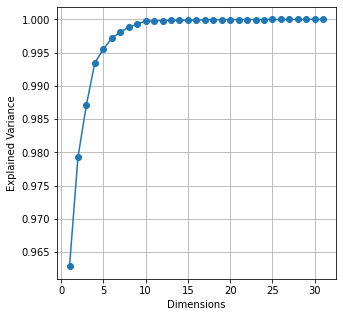

array([0.96285872, 0.97928213, 0.98714954, 0.99348169, 0.99552759,
       0.99713241, 0.9981059 , 0.99880307, 0.99930278, 0.99972016,
       0.99977865, 0.99981909, 0.99984535, 0.99986574, 0.99988424,
       0.99989923, 0.99991302, 0.99992541, 0.99993682, 0.99994779,
       0.99995569, 0.99996278, 0.99996958, 0.99997594, 0.99998185,
       0.99998638, 0.99999049, 0.99999427, 0.99999754, 1.        ,
       1.        ])

In [11]:

Composition_Space.get_PCA_cumsum()


  0%|          | 0/9 [00:00<?, ?it/s]

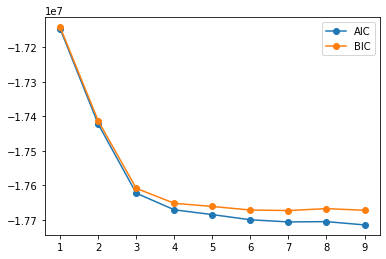

(10,
 [-17146045.873654127,
  -17422221.792144865,
  -17622544.191033244,
  -17670667.248028077,
  -17684587.021906167,
  -17699611.3168031,
  -17705793.60934025,
  -17704962.591373798,
  -17714493.555201188],
 [-17141340.569309954,
  -17412802.25498528,
  -17608410.421058245,
  -17651819.245237667,
  -17661024.786300343,
  -17671334.848381866,
  -17672802.9081036,
  -17667257.657321732,
  -17672074.38833371])

In [10]:
Composition_Space.get_bics_minimization()


In [11]:
ml_params = experiment_param["parameters"]["ml_models"]["GaussianMixture"]
Composition_Space.get_composition_clusters(ml_params=ml_params)




[1489, 23616, 30636]


  0%|          | 0/1489 [00:00<?, ?it/s]

  0%|          | 0/23616 [00:00<?, ?it/s]

  0%|          | 0/30636 [00:00<?, ?it/s]

  0%|          | 0/55741 [00:00<?, ?it/s]

In [10]:
Composition_Space.plot3d()

/u/gazal/Composition_Nfdi_git/output/output_voxels/Output_voxel_cetroids_phases_0
/u/gazal/Composition_Nfdi_git/output/output_voxels/Output_voxel_cetroids_phases_1
/u/gazal/Composition_Nfdi_git/output/output_voxels/Output_voxel_cetroids_phases_2


100%|██████████| 48/48 [00:00<00:00, 2836.30it/s]


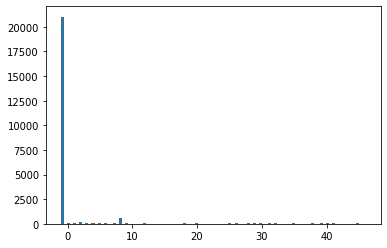

In [12]:
Postprocess_data = Postprocess_data(params=experiment_param)

Postprocess_data.DBSCAN_clustering(cluster_id = 1,eps = 5., min_samples= 25,plot=True,plot3d=True,save=True)
